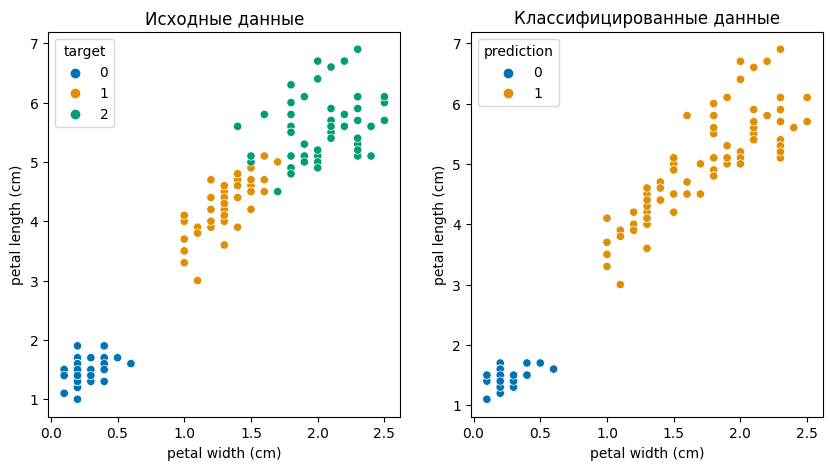

|--- feature_3 <= 0.75
|   |--- class: 0.0
|--- feature_3 >  0.75
|   |--- class: 1.0



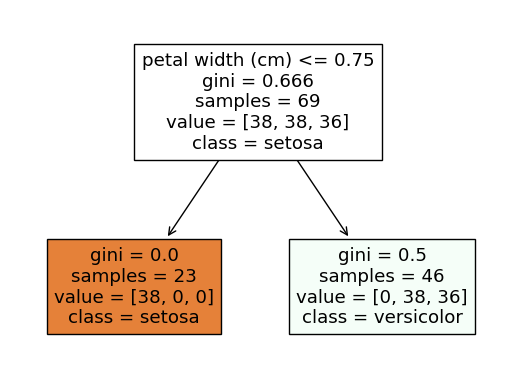

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Загрузка набора данных iris
iris = load_iris()

# Создание DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Разделение данных на тренировочный и тестовый наборы
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# Обучение модели
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1,max_depth=1, random_state=0)
clf.fit(X_train, y_train)

# Получение предсказаний на тестовом наборе
y_pred = clf.predict(X_train)

# Добавление столбца y_pred в DataFrame
data2  = pd.DataFrame(X_train, columns=iris.feature_names)
data2['target'] = y_train
data2['prediction'] = y_pred

# Создание DataFrame
data1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data1['target'] = iris.target

def plot_plots(data1,data2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].set_title('Исходные данные')
    axes[1].set_title('Классифицированные данные')
    # Присвоение каждому объекту своей диаграммы
    sns.scatterplot(x='petal width (cm)', y='petal length (cm)', hue='target', data=data1, palette='colorblind',ax=axes[0])
    sns.scatterplot(x='petal width (cm)', y='petal length (cm)', hue='prediction', data=data2, palette='colorblind',ax=axes[1])
    plt.show()

# Визуализация первого дерева в лесу
def show_three(clf):
    export_text(clf.estimators_[0])
    plt.figure()
    print(export_text(clf.estimators_[0]))
    plot_tree(clf.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    plt.show()
    
plot_plots(data1,data2)
show_three(clf)

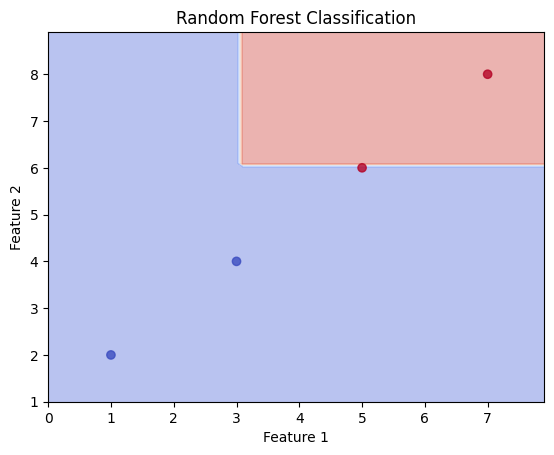

|--- feature_0 <= 3.00
|   |--- class: 0.0
|--- feature_0 >  3.00
|   |--- class: 1.0



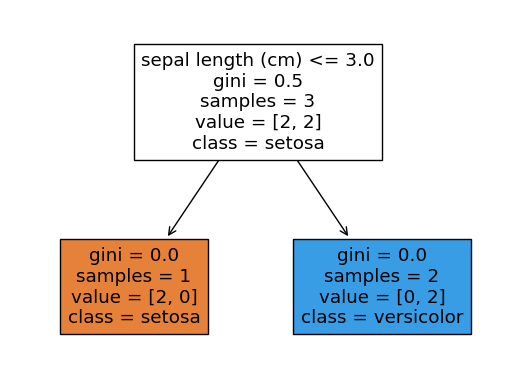

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Создадим обучающие данные
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 0, 1, 1])

# Создадим экземпляр модели случайного леса и обучим ее
clf = RandomForestClassifier(n_estimators=2,max_depth=10, random_state=0)
clf.fit(X, y)

# Определим границы для графика
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Сделаем предсказание для каждой точки на графике
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Нарисуем разделяющие линии
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Classification')
plt.show()
show_three(clf)

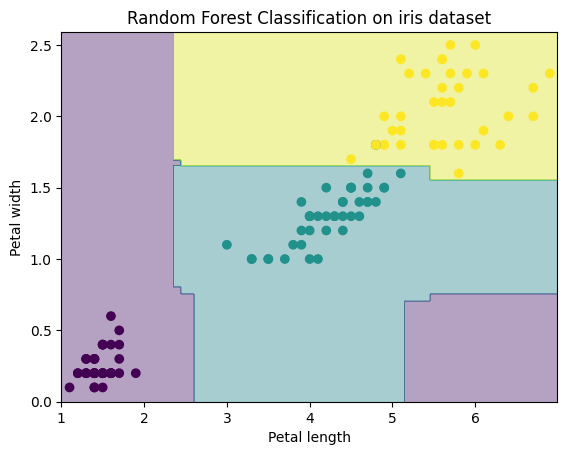

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные iris
iris = load_iris()

# Разделяем данные на тестовый и обучающий наборы
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, 2:], iris.target, test_size=0.2)

# Создаем экземпляр модели Random Forest и обучаем ее на обучающих данных
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Определяем границы для графика
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Сделаем предсказание для каждой точки на графике
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Нарисуем boundary lines
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=1.0)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Random Forest Classification on iris dataset')
plt.show()

Accuracy: 1.0


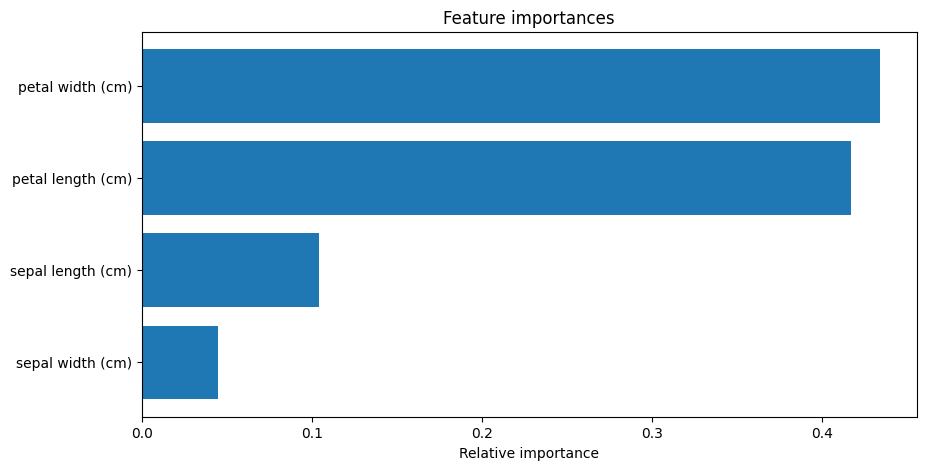

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка набора данных iris
iris = load_iris()

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Создание экземпляра класса случайный лес
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели
rf.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = rf.predict(X_test)

# Оценка качества модели на тестовом наборе данных
print("Accuracy:", accuracy_score(y_test, y_pred))

# Важность признаков
importances = pd.Series(data=rf.feature_importances_, index=iris.feature_names)
importances_sorted = importances.sort_values()

# Построение графика важности признаков
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.barh(range(len(importances_sorted)), importances_sorted)
plt.yticks(range(len(importances_sorted)), importances_sorted.index)
plt.xlabel("Relative importance")
plt.show()